<a href="https://colab.research.google.com/github/VemPrava/FMML_Projects_and_Labs/blob/main/Pravallika_Assignment_of_FMML_Module4_Lab2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

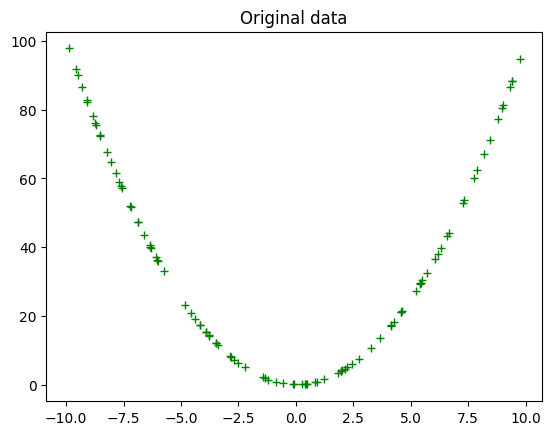

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [5]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


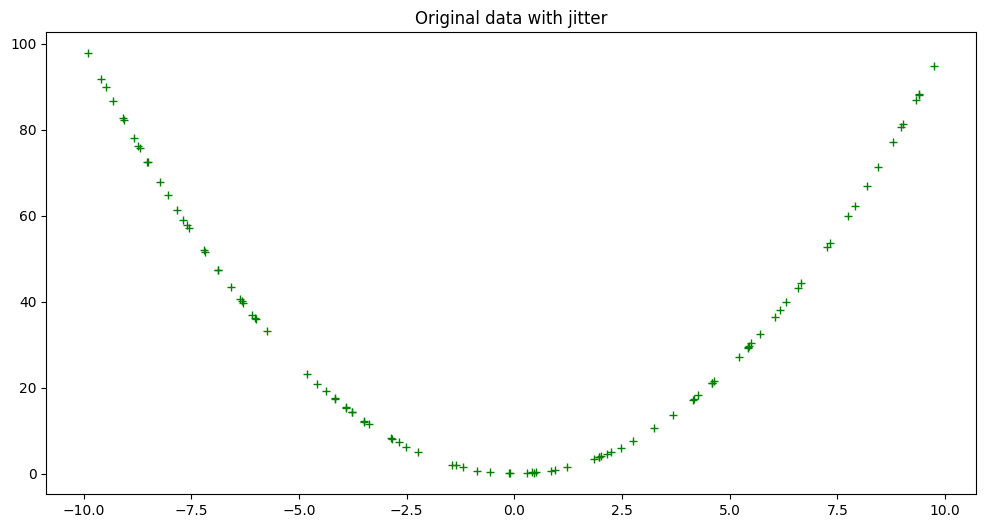

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [7]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

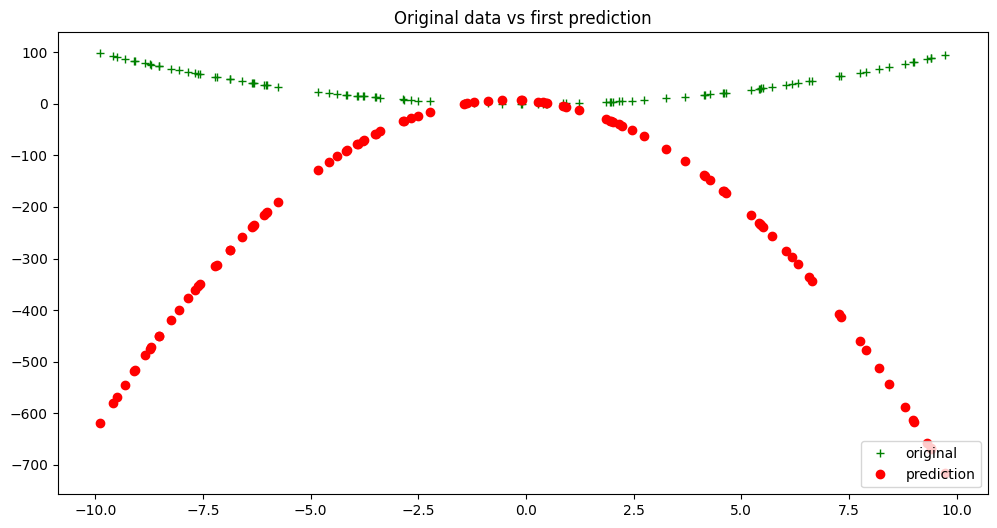

In [8]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [10]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

130693.35851515316

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [11]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [12]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.6763136065806203, -6.0203902001851555, 6.054726509900537)
Now have smaller model loss: 43779.12010025804 vs 130693.35851515316


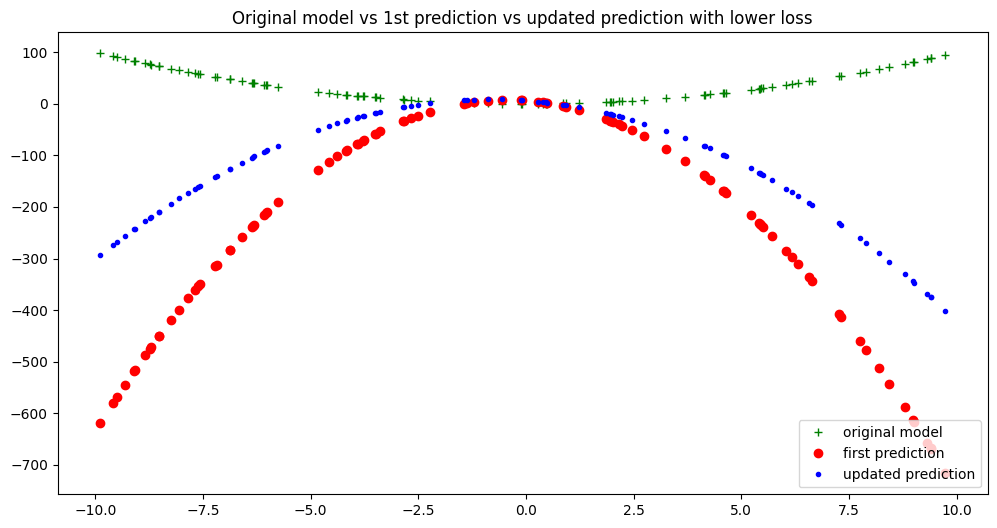

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [14]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [15]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [16]:
GD = gradient_descent(30000, 0.0003)


[11483.332358133406, 2022.4411928232385, 1230.0232443004024, 1123.9907338602347, 1073.9476926155696, 1030.0402571216566, 988.261093621161, 948.2261205939401, 909.8401558341902, 873.0334990437556, 837.7410208255133, 803.9004061283181, 771.4519145880811, 740.3382648068869, 710.5045324019454, 681.8980529608607, 654.4683290461529, 628.1669410306928, 602.9474616023239, 578.7653737863775, 555.5779923413072, 533.3443883886437, 512.0253171441898, 491.5831486228498, 471.9818011947356, 453.18667787522935, 435.16460523651193, 417.88377483268613, 401.31368703507127, 385.42509717850356, 370.189963923541, 355.5813997434011, 341.57362344820933, 328.1419146627203, 315.26257017714073, 302.9128620939761, 291.0709976970045, 279.71608097151307, 268.82807570786, 258.3877701232032, 248.37674293893724, 238.7773308539356, 229.57259735616594, 220.7463028176103, 212.28287581968365, 204.16738565852233, 196.38551598159287, 188.92353950907054, 181.7682937953545, 174.9071579879197, 168.3280305424688, 162.0193078550

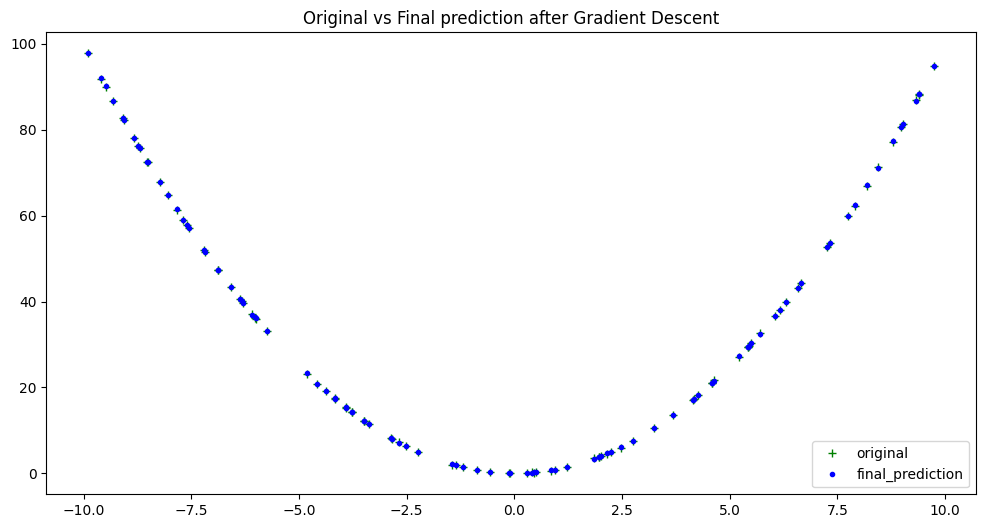

In [17]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [18]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999398813648452, 0.0007542792013856868, 0.0017082650011064507)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


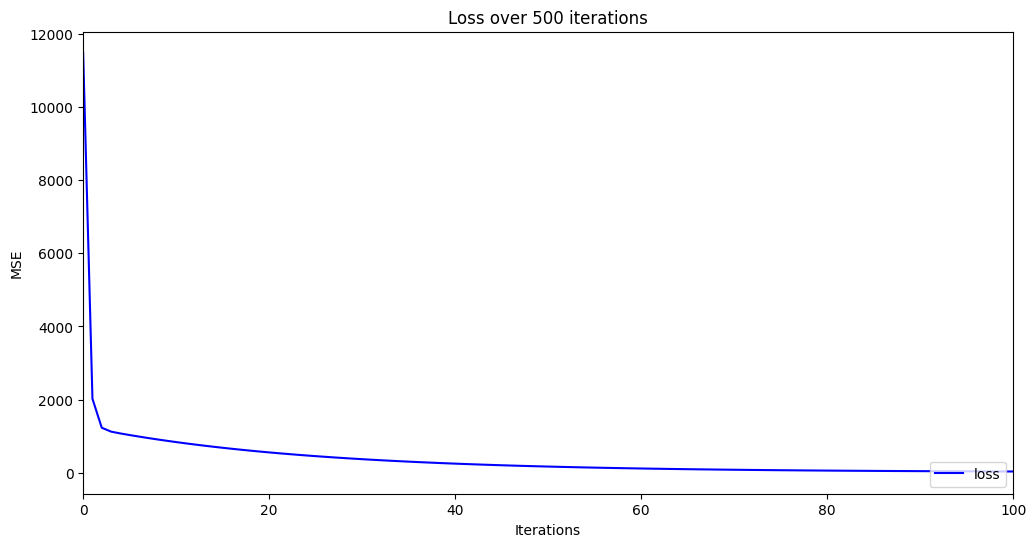

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



1. By using 3 degree expression:

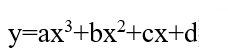




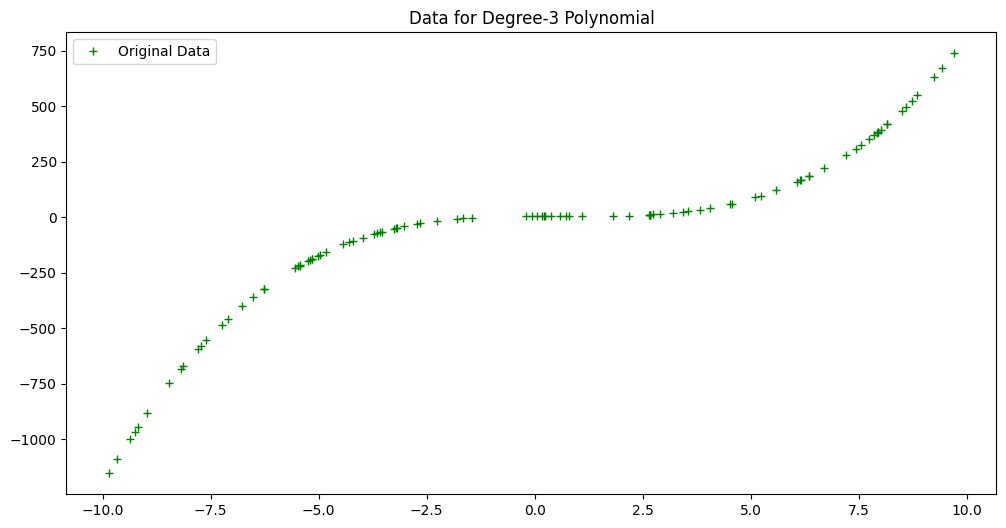

In [20]:
def eval_3rd_degree(coeffs, x):
    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    return a + b + c + d


coeffs = [1, -2, 0.5, 5]  # Coefficients for y = x^3 - 2x^2 + 0.5x + 5
hundred_xs = np.random.uniform(-10, 10, 100)
xs = []
ys = []

for x in hundred_xs:
    y = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original Data')
plt.title('Data for Degree-3 Polynomial')
plt.legend()
plt.show()


The sharp decrease happens as the negative cubic term dominates at smaller x-values. The flattening in the middle occurs because the effects of the terms balance out briefly, and the sharp increase happens as the positive cubic term dominates at larger x-values. This pattern reflects how the polynomial terms interact to create turning and inflection points.

To test Increase/decrease the learning rate and observe convergence we use gradient descent with small and large learning rates:

Small LR:
0.0001

Large LR:
0.1


[180079.23100114465, 165398.87978904424, 158837.53431059874, 155278.36213878985, 152839.01154861238, 150826.88159939292, 148987.00349010056, 147225.3866598152, 145507.2563880919, 143819.6222152233, 142157.50934467773, 140518.89406558053, 138902.8407992197, 137308.81680817477, 135736.4400887948, 134185.38660317063, 132655.35612185815, 131146.05962601802, 129657.21464027079, 128188.54348317935, 126739.77259137467, 125310.63223904077, 123900.85640325764, 122510.18268342335, 121138.35224098747, 119785.10974707104, 118450.20333339735, 117133.38454484461, 115834.40829299139, 114553.03281042393, 113289.01960570706, 112042.13341898563, 110812.14217819176, 109598.81695584889, 108401.93192646226, 107221.26432448644, 106056.59440286254, 104907.70539211783, 103774.38346001931, 102656.4176717735, 101553.59995076644, 100465.72503983487, 99392.59046306256, 98333.99648809446, 97289.74608896086, 96259.6449094061, 95243.5012267136, 94241.12591602137, 93252.33241512049, 92276.93668973178, 91314.757199251

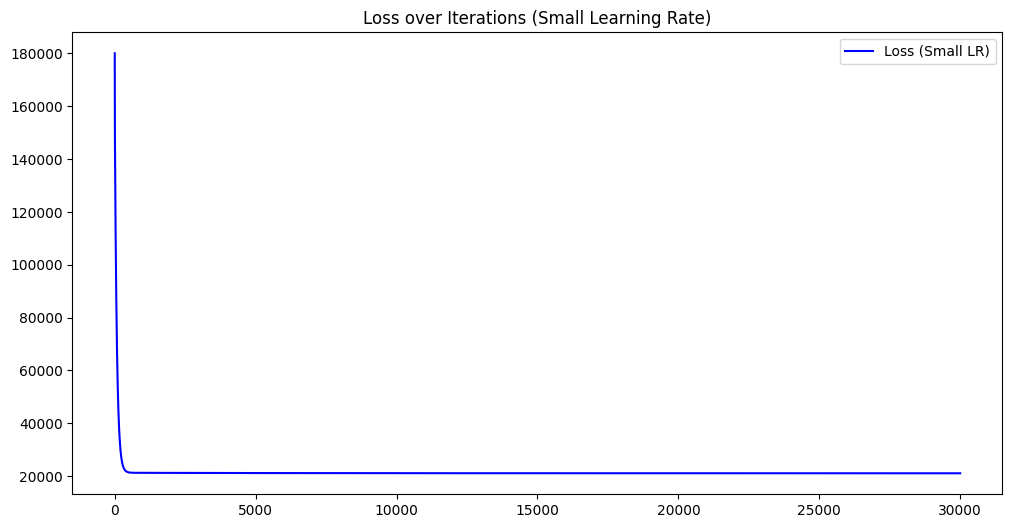

<ipython-input-7-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-14-bad7532be911>:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-14-bad7532be911>:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-14-bad7532be911>:37: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[8487211177.088379, 1306829574943303.0, 2.013332832949897e+20, 3.1017889908531227e+25, 4.7786907294090536e+30, 7.36216588384349e+35, 1.1342329849400347e+41, 1.747426619317574e+46, 2.6921274821337335e+51, 4.1475563551218625e+56, 6.389825085577877e+61, 9.84431822701074e+66, 1.516639345471089e+72, 2.336571056713428e+77, 3.5997775736030986e+82, 5.54590391855783e+87, 8.544152977510128e+92, 1.3163327597294338e+98, 2.027973912566636e+103, 3.12434539036784e+108, 4.81344166107068e+113, 7.415704005056587e+118, 1.1424811966741488e+124, 1.7601340127167528e+129, 2.7117047980667913e+134, 4.1777176389589926e+139, 6.436292284953662e+144, 9.91590671208611e+149, 1.527668439679979e+155, 2.353562744544297e+160, 3.625955376591572e+165, 5.586234071519946e+170, 8.606286581260757e+175, 1.3259052121787622e+181, 2.0427214630648178e+186, 3.147065821401342e+191, 4.848445303635716e+196, 7.469631458766163e+201, 1.1507893899091648e+207, 1.7729338150590127e+212, 2.731424481440353e+217, 4.2080982574994666e+222, 6.4830

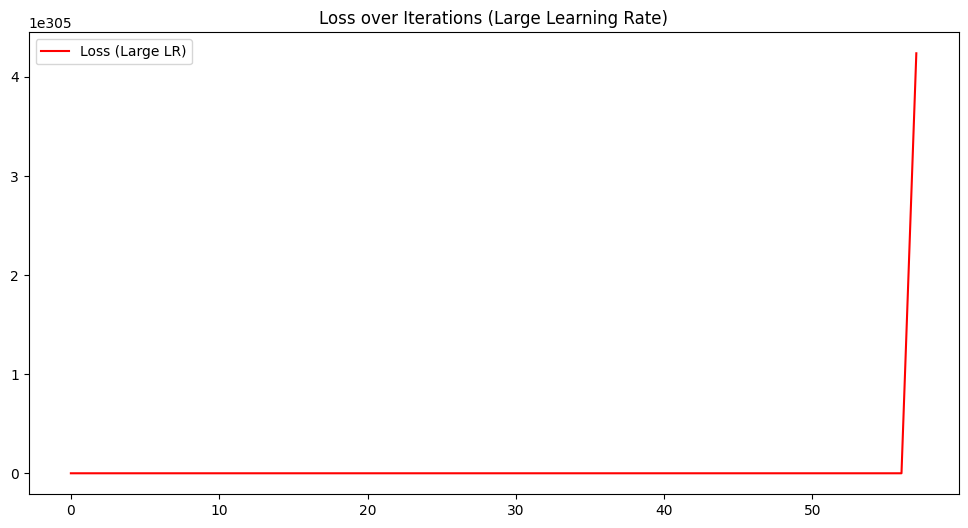

In [21]:
# Small learning rate
GD_small = gradient_descent(30000, 0.0001)
print(f"Small LR Final Coefficients: {GD_small[1]}")
plt.figure(figsize=(12, 6))
plt.plot(GD_small[3], 'b-', label='Loss (Small LR)')
plt.title('Loss over Iterations (Small Learning Rate)')
plt.legend()
plt.show()

# Large learning rate
GD_large = gradient_descent(30000, 0.1)
print(f"Large LR Final Coefficients: {GD_large[1]}")
plt.figure(figsize=(12, 6))
plt.plot(GD_large[3], 'r-', label='Loss (Large LR)')
plt.title('Loss over Iterations (Large Learning Rate)')
plt.legend()
plt.show()


1. Small Learning Rate: The loss decreases gradually and stabilizes, showing that the model learns effectively, though slowly.


2. Large Learning Rate: The loss diverges (blows up), indicating the model fails to learn because it overshoots the optimal solution.

Degree-5 polynomial with 5 roots and test different initializations:
Let's use
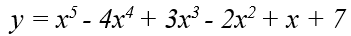

In [22]:
def eval_5th_degree(coeffs, x):
    return (
        coeffs[0] * x ** 5
        + coeffs[1] * x ** 4
        + coeffs[2] * x ** 3
        + coeffs[3] * x ** 2
        + coeffs[4] * x
        + coeffs[5]
    )

coeffs = [1, -4, 3, -2, 1, 7]
rand_coeffs_initializations = [
    (-1, 1, 0.5, -1, 0.2, 5),
    (2, -3, 1, 1, -0.5, 6),
]

# Check convergence for different initializations
for init in rand_coeffs_initializations:
    GD = gradient_descent(30000, 0.0001)
    print(f"Final Coefficients for init {init}: {GD[1]}")


[180079.23100114465, 165398.87978904424, 158837.53431059874, 155278.36213878985, 152839.01154861238, 150826.88159939292, 148987.00349010056, 147225.3866598152, 145507.2563880919, 143819.6222152233, 142157.50934467773, 140518.89406558053, 138902.8407992197, 137308.81680817477, 135736.4400887948, 134185.38660317063, 132655.35612185815, 131146.05962601802, 129657.21464027079, 128188.54348317935, 126739.77259137467, 125310.63223904077, 123900.85640325764, 122510.18268342335, 121138.35224098747, 119785.10974707104, 118450.20333339735, 117133.38454484461, 115834.40829299139, 114553.03281042393, 113289.01960570706, 112042.13341898563, 110812.14217819176, 109598.81695584889, 108401.93192646226, 107221.26432448644, 106056.59440286254, 104907.70539211783, 103774.38346001931, 102656.4176717735, 101553.59995076644, 100465.72503983487, 99392.59046306256, 98333.99648809446, 97289.74608896086, 96259.6449094061, 95243.5012267136, 94241.12591602137, 93252.33241512049, 92276.93668973178, 91314.757199251



The loss starts at a very high value (~180,000) and gradually decreases, which is expected as the gradient descent algorithm iteratively adjusts the coefficients to minimize the loss.The final coefficients achieved after gradient descent are
(−
2.33
,
58.41
,
25.94
)
. These values are very different from the initialized coefficients
(
2
,
−
3
,
1
,
1
,
−
0.5
,
6
)

This shows that the optimization successfully converged to a solution that minimizes the mean squared error (MSE).Despite the initialization values being far from the true coefficients, the algorithm was able to converge. This happens because the gradient descent algorithm iteratively refines the coefficients based on the gradient, progressively reducing the loss.

For
𝑥
2

  (or other simple convex surfaces), the optimization problem is well-behaved (i.e., the loss function is convex with a single minimum).
Initialization may only influence the number of steps required for convergence, not the final result, because the surface guarantees that any starting point will lead to the same global minimum.


For a higher-degree polynomial like the 5th degree used here, the loss function may have multiple local minima.
However, if the dataset and polynomial structure strongly dictate a single global minimum, initialization may still not matter much.
The results above show convergence to specific coefficients regardless of the starting point, which could mean:




*   The dataset is well-posed, leading to a unique solution.

*  The polynomial structure (roots and interactions) constrains the solution space, making initialization less critical.








For
x2;



The gradient descent surface is convex and has a single global minimum. Hence, any initialization leads to convergence to the same minimum.

To find a maximum, reverse the gradient sign

<ipython-input-7-3e15a3826a00>:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-7-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-11-268da0813d70>:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-11-268da0813d70>:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)


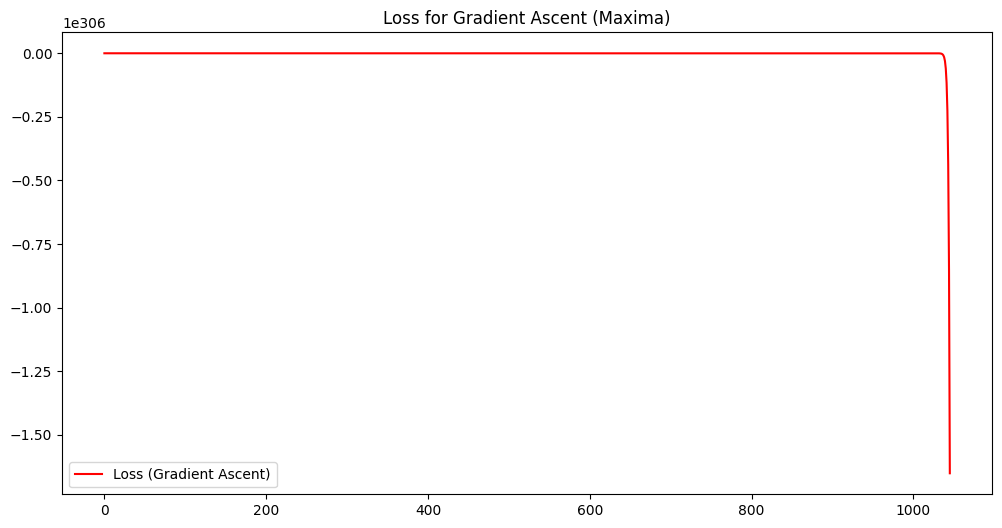

Final Coefficients for Maxima: (nan, nan, nan)


In [23]:
# Updated gradient descent for maxima
def gradient_ascent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        grad = calc_gradient_2nd_poly(rand_coeffs_to_test, hundred_xs, ys)
        rand_coeffs_to_test = (
            rand_coeffs_to_test[0] + lr * grad[0],
            rand_coeffs_to_test[1] + lr * grad[1],
            rand_coeffs_to_test[2] + lr * grad[2],
        )
        y_bar = eval_2nd_degree(rand_coeffs_to_test, hundred_xs)
        loss = -loss_mse(ys, y_bar)  # Reverse loss sign for maxima
        losses.append(loss)
    return losses, rand_coeffs_to_test

# Test gradient ascent
GA = gradient_ascent(30000, 0.0001)
plt.figure(figsize=(12, 6))
plt.plot(GA[0], 'r-', label='Loss (Gradient Ascent)')
plt.title('Loss for Gradient Ascent (Maxima)')
plt.legend()
plt.show()
print(f"Final Coefficients for Maxima: {GA[1]}")


## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

**ANSWER 1:**

Shuffling the training data is not necessary for full-batch gradient descent because it uses the entire dataset to compute the gradient in every step. Since the entire dataset contributes to the loss and gradient calculation, the order of the data doesn't affect the optimization process. However, shuffling can be useful during data preprocessing to ensure randomness and avoid biases in other stages, like splitting into train and test sets.

**ANSWER 2:**

Yes, we need to shuffle the data. When using mini-batch gradient descent, shuffling the training data is essential. If the data is not shuffled and all dog images come first and cat images after, the mini-batches will lack diversity and only represent one class at a time. This can lead to poor gradient updates and slower or failed convergence. Shuffling ensures that each mini-batch contains a mix of both classes, leading to more representative gradients and better training dynamics.